In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import thanos
from thanos.gen import *
from thanos.util import *
from thanos.operator import *
from thanos.SyntheticDataset import *
from copy import deepcopy


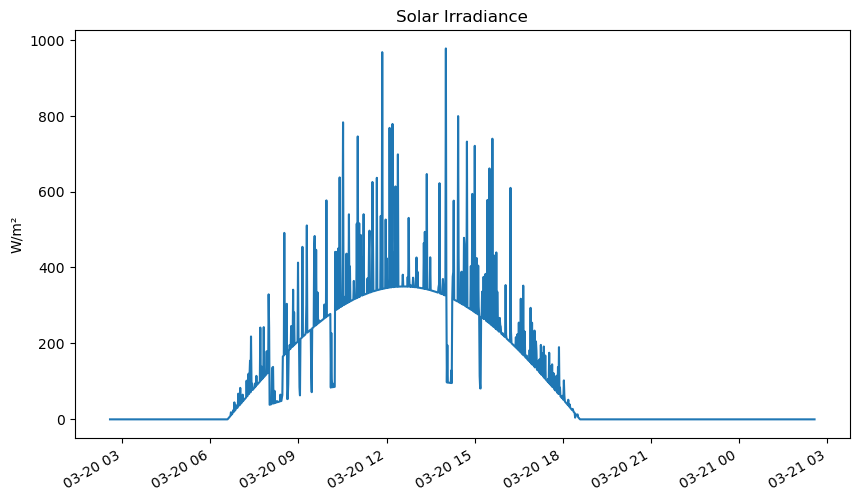

In [27]:
seed = seeded_gen(42)
days = 7
minutes_per_day = 24 * 60
total_minutes = days * minutes_per_day
solar_daily = Seasonality(period=minutes_per_day, phase=60*20).apply(np.clip, 0, 1)
solar_weather = RandomVariable('gamma', seed, 2.0, 0.2).apply(np.clip, 0.5, 1.5)
solar_seasonal = Seasonality(period=minutes_per_day*365, phase=0).apply(np.clip, 0.7, 1.3)
cloud_events = BinMarkovAnomaly(seed, p_on=0.01, p_off=0.2)
cloud_impact = cloud_events.apply(lambda x: 0.3 if x else 1.0)
solar_output = (solar_daily * solar_weather * solar_seasonal * cloud_impact * 1000).apply(np.clip, 0, 1000)
solar_data = np.fromiter(solar_output.reset(), float, count=total_minutes)
start_date = datetime.now() - timedelta(days=days)
date_index = pd.date_range(start=start_date, periods=total_minutes, freq='1min')

solar_df = pd.DataFrame({
    'irradiance_w_m2': solar_data,
}, index=date_index)

plt.figure(figsize=(10, 6))
solar_df['irradiance_w_m2'].iloc[:minutes_per_day].plot()
plt.title('Solar Irradiance')
plt.ylabel('W/m²')
plt.show()

solar_df.to_csv('solar_irradiance.csv')